<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°072


## I.- Problema 01


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>


El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [8]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [12]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [13]:
print(digits.shape)
print(digits.info())
print(digits.describe())

(1797, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c2

Tenemos 1797 mediciones en el dataframe "digits", con 65 columnas, donde la columna nro. 65 corresponde a la columna "target" es decir, el número que fué escrito a mano en esa medición.
No se muestra ningún dato nulo, es decir, aparentemente no hubo problemas con la lectuar de datos.

In [14]:
digits.duplicated().sum()

np.int64(0)

Tampoco se ven elementos repetidos.

In [ ]:
columns= digits.columns
for i  in columns:
    sns.boxplot(x=digits[i],hue=digits[columns[-1]])
    plt.show()

Con estos boxplots podemos ver que si bien hay columnas que tienen las clases bastante distinguibles, tambien hay clases que tienen muchos outliers, es decir, están  muy repartidas en el gráfico, lo que hace que la media no sea representativa para  estandarizar. Tambien podría indicar que le será dificil a los modelos precedir de forma correcta las clases descentralizadas.

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [16]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

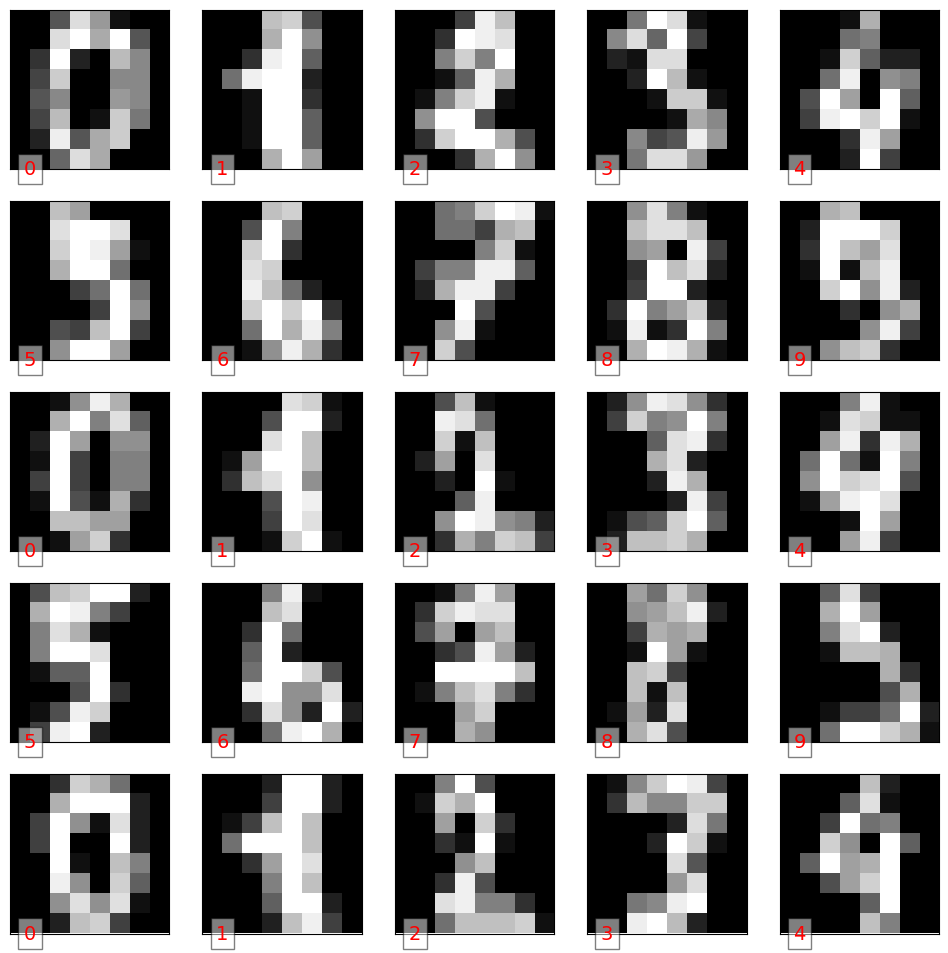

In [25]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
## FIXME
fotos = digits_dict['images'][:25]
labels = digits_dict['target'][:25]
fotos_arregladas = fotos.reshape(-1,8,8)
for i, ax in enumerate(axs.flat):
    # Mostrar la imagen correspondiente en formato 8x8
    ax.imshow(fotos[i], cmap='gray')

    # Superponer el label como texto en la esquina inferior derecha
    ax.text(0.5, 7.5, str(labels[i]), color='red', fontsize=14,
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    # Quitar los ejes para una mejor visualización
    ax.set_xticks([])
    ax.set_yticks([])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [32]:
# features, target

X = digits.drop(columns="target").values.astype(int)
y = digits["target"].values

Entrenaré Regresión logística, K-Nearest Neighbors y Naive Bayes

           Tiempo  Accuracy  Precision    Recall        F1
modelos                                                   
LR       0.295844  0.959259   0.960884  0.961888  0.960933
KN       0.000708  0.983333   0.983919  0.984198  0.983885
NB       0.004690  0.898148   0.908292  0.903172  0.902381


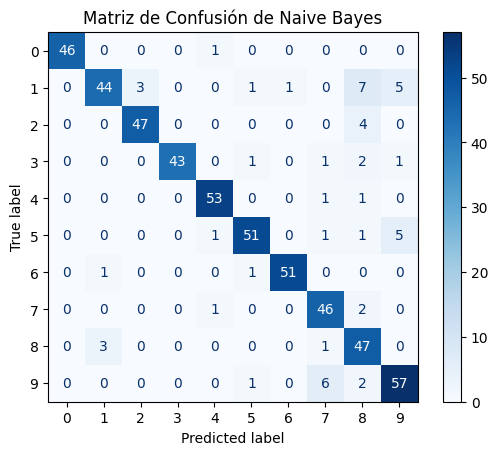

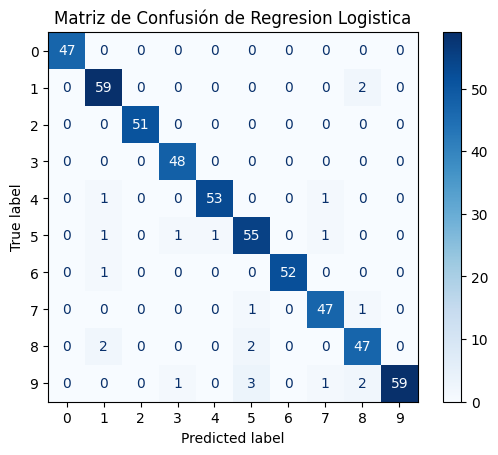

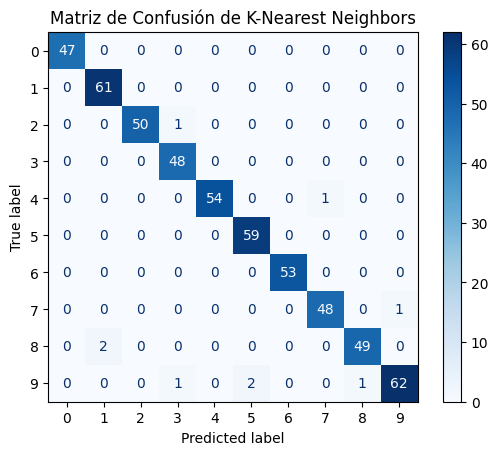

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)
import time
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
ini = time.time()
LR.fit(X_train,y_train)
fin = time.time()
LR_time = fin - ini
LR_p = LR.predict(X_test)
#K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
ini = time.time()
KN.fit(X_train,y_train)
fin = time.time()
KN_time = fin - ini 
KN_p = KN.predict(X_test)
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
ini = time.time()
NB.fit(X_train,y_train)
fin = time.time()
NB_time = fin - ini
NB_p = NB.predict(X_test)
#Ahora las métricas

metricas_df = pd.DataFrame()
metricas_df['Tiempo'] = [LR_time, KN_time, NB_time]
 #   * **Accuracy**
 #   * **Precision**
 #   * **Recall**
 #   * **F1-score**
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
NB_acc = accuracy_score(y_test,NB_p)
LR_acc = accuracy_score(y_test,LR_p)
KN_acc = accuracy_score(y_test,KN_p)

metricas_df['Accuracy'] = [LR_acc,KN_acc,NB_acc]

NB_prec = precision_score(y_test,NB_p, average='macro')
LR_prec = precision_score(y_test,LR_p, average='macro')
KN_prec = precision_score(y_test,KN_p, average='macro')


metricas_df['Precision'] = [LR_prec,KN_prec,NB_prec]

NB_recall= recall_score(y_test,NB_p, average='macro')
LR_recall= recall_score(y_test,LR_p, average='macro')
KN_recall= recall_score(y_test,KN_p, average='macro')

metricas_df['Recall'] = [LR_recall,KN_recall,NB_recall]

NB_f1 = f1_score(y_test,NB_p, average='macro')
LR_f1 = f1_score(y_test,LR_p, average='macro')
KN_f1 = f1_score(y_test,KN_p, average='macro')

metricas_df['F1'] = [LR_f1,KN_f1,NB_f1]
metricas_df['modelos'] = ['LR','KN','NB']
metricas_df.set_index(['modelos'],drop=True,inplace=True)
print(metricas_df)

#Matriz de confusion
NB_cm = confusion_matrix(y_test,NB_p)
LR_cm = confusion_matrix(y_test,LR_p)
KN_cm = confusion_matrix(y_test,KN_p)
NB_cm_d = ConfusionMatrixDisplay(confusion_matrix=NB_cm, display_labels=digits_dict['target_names'])
NB_cm_d.plot(cmap= 'Blues')
plt.title('Matriz de Confusión de Naive Bayes')
LR_cm_d = ConfusionMatrixDisplay(confusion_matrix=LR_cm, display_labels=digits_dict['target_names'])
LR_cm_d.plot(cmap= 'Blues')
plt.title('Matriz de Confusión de Regresion Logistica')
KN_cm_d = ConfusionMatrixDisplay(confusion_matrix=KN_cm, display_labels=digits_dict['target_names'])
KN_cm_d.plot(cmap= 'Blues')
plt.title('Matriz de Confusión de K-Nearest Neighbors')
plt.show()

¿Cuál modelo es mejor basado en sus métricas?

El mejor modelo solo basado en estadisticas es K-nearest neghbors, con los mejores indicadores en todos los scores probados.

¿Cuál modelo demora menos tiempo en ajustarse?

K-Nearest-Neighbors

¿Qué modelo escoges?

Teniendo en mente ambas preguntas anteriores, K-Nearest-Neighbors


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_15898/2836314872.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i),
/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_15898/2836314872.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt.cm.get_cmap('tab10')(i),
/var/folders/hs/jrlgxzq10918y2jbc8cddg500000gn/T/ipykernel_15898/2836314872.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color=plt

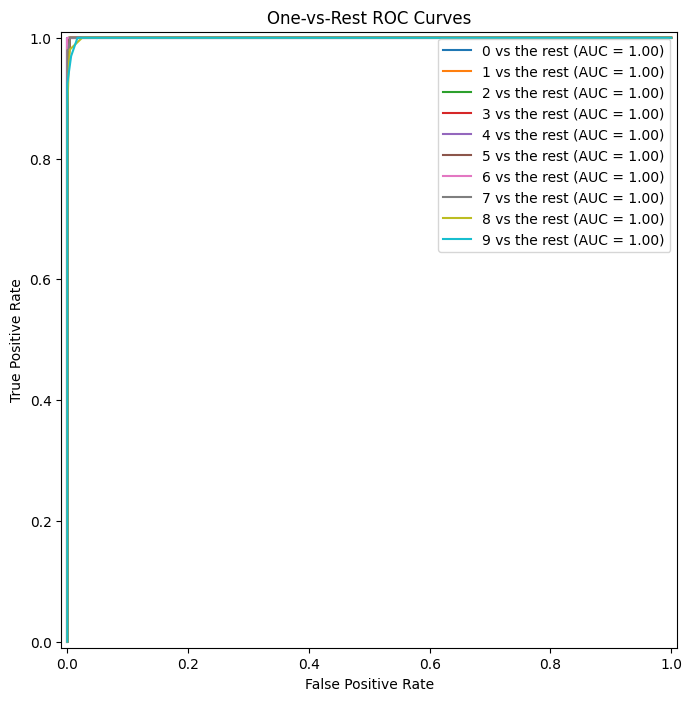

In [63]:
# FIXME
from sklearn.preprocessing import LabelBinarizer
plt.figure(figsize=(10,8))
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
for i in range(10):
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id
    y_score = KN.predict_proba(X_test)
    from sklearn.metrics import RocCurveDisplay

    display = RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color=plt.cm.get_cmap('tab10')(i),
        plot_chance_level=False,
        ax=plt.gca()
    )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC Curves")
plt.legend(loc="best")
plt.show()

Con este gráfico podemos notar que el modelo es bastante bueno, y que tiene un muy buen indice de verdaderos positivos para cada clase.

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [65]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

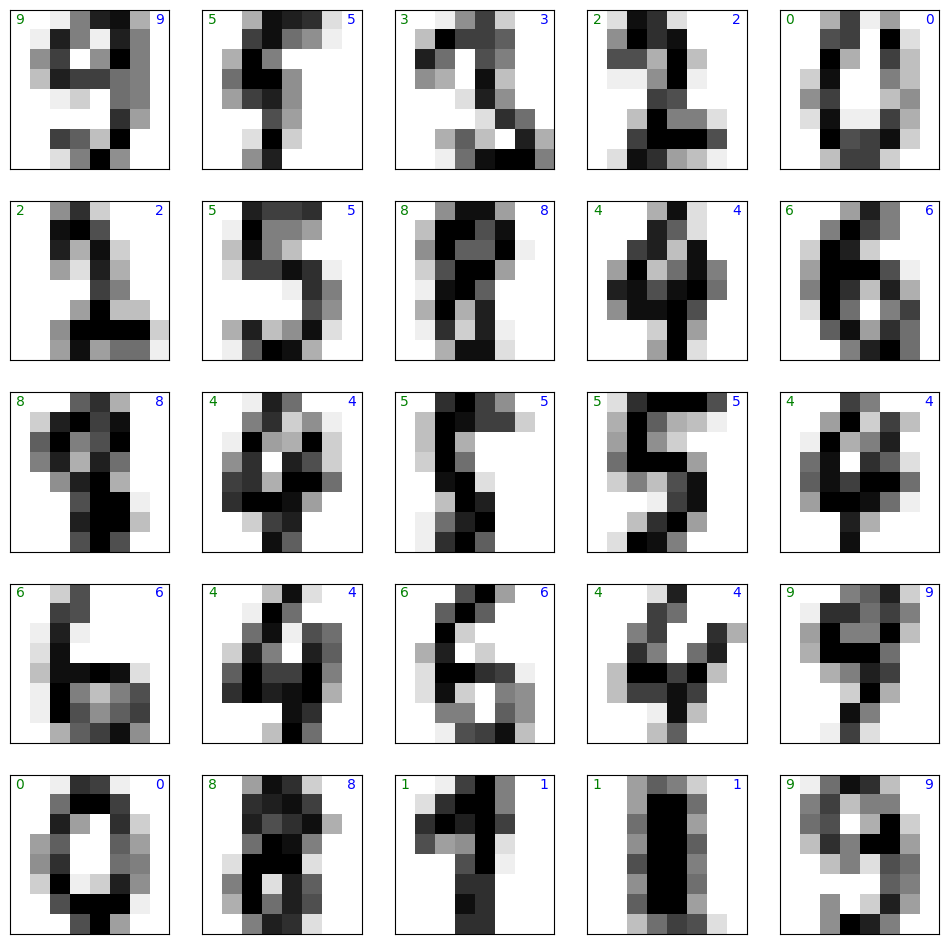

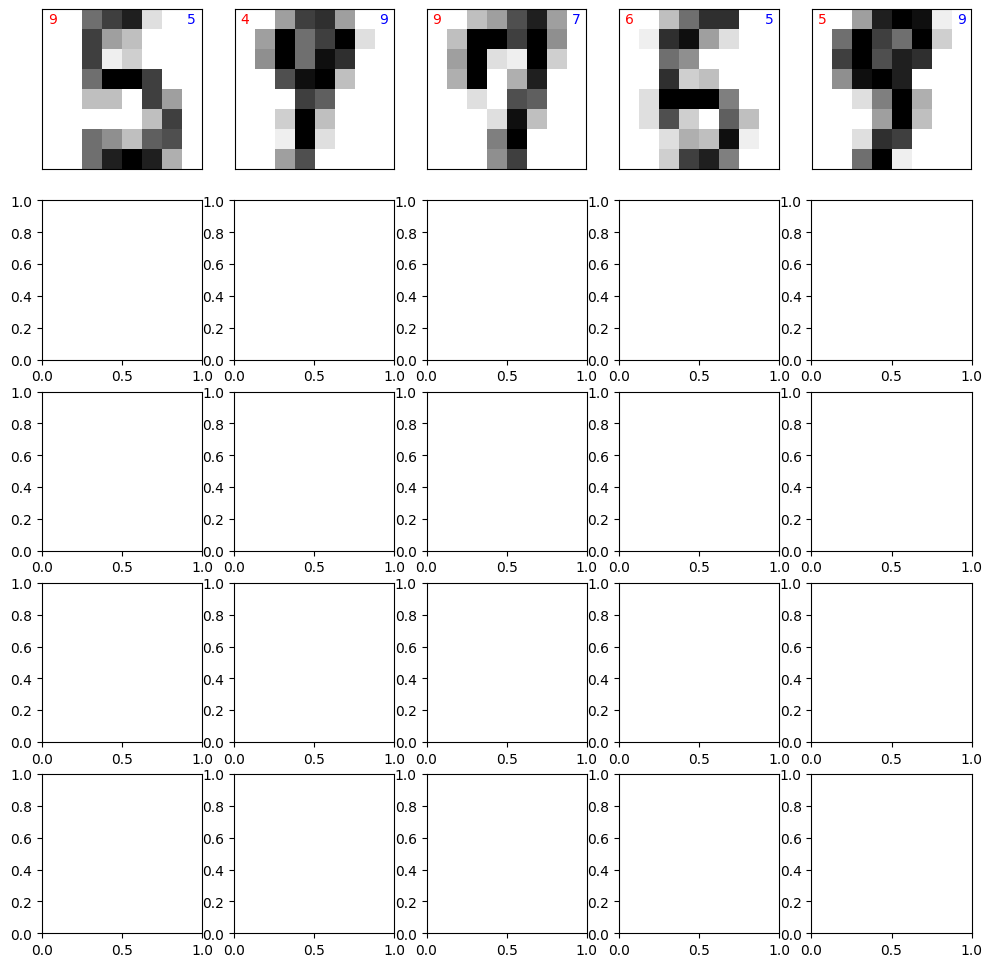

In [67]:
# FIXME
mostrar_resultados(digits, KN, nx, ny, 'correctos')

mostrar_resultados(digits, KN, nx, ny, 'incorrectos')

Los errores registrados ocurren probablemente porque al momento de ver los valores numericos de los pixeles, se encuentra con que son muy parecidos, o porque se parecen mas a los de otra clase. Esto puede darse por que las imagenes están escaladas en resolución hacia abajo, lo que hace que se pierda informacion.

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El modelo tiene excelentes métricas en general, lo que nos indica que el modelo "K-nearest neighbors" funciona muy bien para esta tarea. Un tabajo futuro sería intentar lograr esto mismo con fotos de más de un dígito (Una idea sería dividir los números de mas de un dígito en varios de un solo dígito, y luego aplicar el modelo. El problema sería qque se requeriría un programa que logre serparar números, lo que probablemente a la necesidad de entrenar otro modelo). Las dificultades principales de este modelo radican en la perdida de información que se genera al bajar la resolución. El problema de trabajar con imagenes de mayor resolución viene en la forma de la memoria, ya que entre más precisa la imagen, más memoria consume, y para entrenar un modelo se requieren muchos datos. 